In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.1.2
2.5


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [4]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [5]:
planning_steps

array([0, 1, 2])

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [7]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [8]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [9]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2'], function=<function sum_over at 0x00000259322A3678>)
ScalarOutcome('A.1_Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x00000259322A3678>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x00000259322A3678>)
ScalarOutcome('A.2_Expected Annual Damage', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2'], function=<function sum_over at 0x00000259322A3678>)
ScalarOutcome('A.2_Dike Investment Costs', variable_name=['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 100 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


dict_keys(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage', 'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths', 'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths', 'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

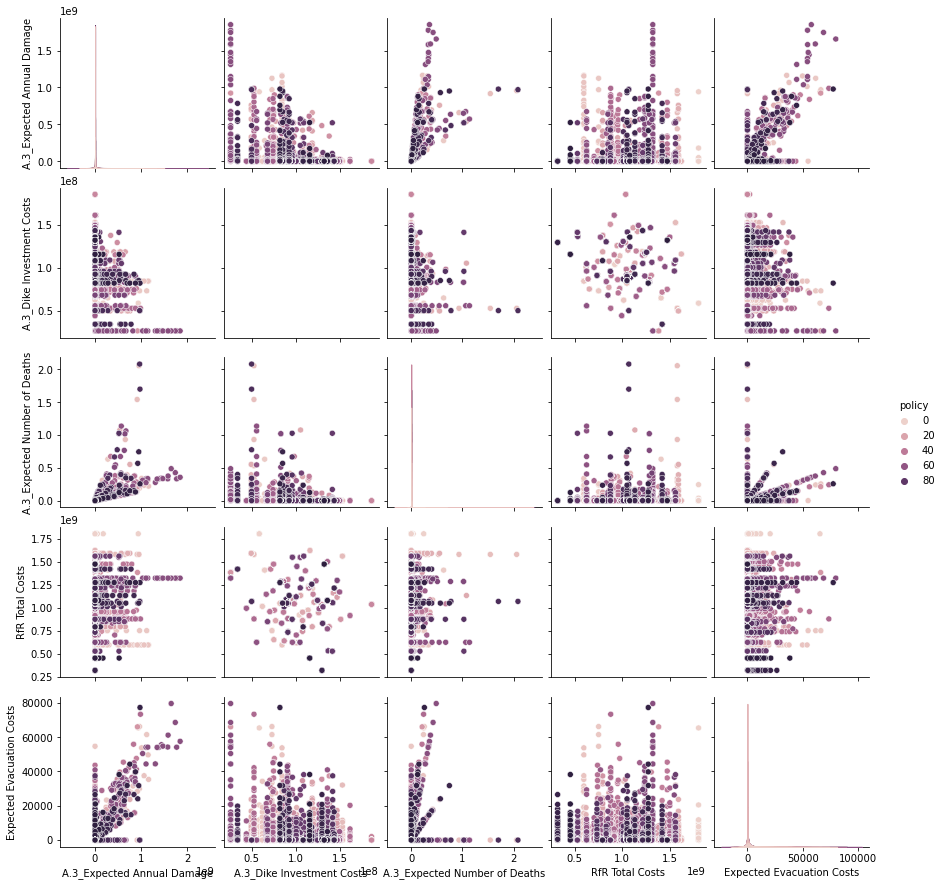

In [10]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=100)
#observing the simulation runs
experiments, outcomes = results

policies = experiments['policy']

for i, policy in enumerate(np.unique(policies)):
    experiments.loc[experiments['policy']==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]
sns.pairplot(A_3data, hue='policy', vars=['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

In [14]:
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results

In [12]:
save_results((experiments, outcomes), './results_analysis1.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Quint\Documents\GitHub\MBDM\final assignment\results_analysis1.tar.gz


In [46]:
experiments,outcomes=load_results('./results_analysis1.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Quint\Documents\GitHub\MBDM\final assignment\results_analysis1.tar.gz


In [40]:
#observing the simulation runs
print(outcomes.keys())
experiments

dict_keys(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage', 'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths', 'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths', 'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,92.0,36.627483,1.0,0.717891,286.950920,1.5,0.711619,116.904455,1.5,0.997152,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,0,0,dikesnet
1,129.0,48.135382,10.0,0.174033,315.398612,10.0,0.190892,57.960907,10.0,0.444956,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,1,0,dikesnet
2,105.0,114.005436,1.5,0.497765,117.213436,1.5,0.223015,193.161033,1.0,0.833327,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,2,0,dikesnet
3,79.0,235.431159,1.5,0.971077,32.298769,1.0,0.342229,319.701227,1.5,0.771428,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,3,0,dikesnet
4,121.0,135.055121,1.5,0.112816,299.595954,1.0,0.881769,89.265982,1.0,0.807592,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,102.0,199.190730,1.0,0.146399,221.647121,10.0,0.725807,348.536739,1.0,0.823555,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,95,99,dikesnet
9996,100.0,31.914259,1.5,0.814719,292.242401,10.0,0.671766,280.246302,1.0,0.347260,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,96,99,dikesnet
9997,27.0,230.568173,10.0,0.543080,263.174397,10.0,0.616425,335.119685,1.5,0.291768,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,97,99,dikesnet
9998,63.0,260.157638,1.0,0.402495,320.297261,1.5,0.751741,146.467332,10.0,0.607875,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,98,99,dikesnet


In [47]:
data = pd.DataFrame(outcomes)
data['policy'] = policies

A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]

In [48]:
data['total expected Annual Damage']=data['A.1_Expected Annual Damage']+data['A.2_Expected Annual Damage']+data['A.3_Expected Annual Damage']+data['A.4_Expected Annual Damage']+data['A.5_Expected Annual Damage']
data['total dike investment costs']=data['A.1_Dike Investment Costs']+data['A.2_Dike Investment Costs']+data['A.3_Dike Investment Costs']+data['A.4_Dike Investment Costs']+data['A.5_Dike Investment Costs']
data['total Expected Number of Deaths']=data['A.1_Expected Number of Deaths']+data['A.2_Expected Number of Deaths']+data['A.3_Expected Number of Deaths']+data['A.4_Expected Number of Deaths']+data['A.5_Expected Number of Deaths']

In [49]:
A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]
A_totaldata=data[['total expected Annual Damage','total dike investment costs','total Expected Number of Deaths','RfR Total Costs', 'Expected Evacuation Costs', "policy"]]

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

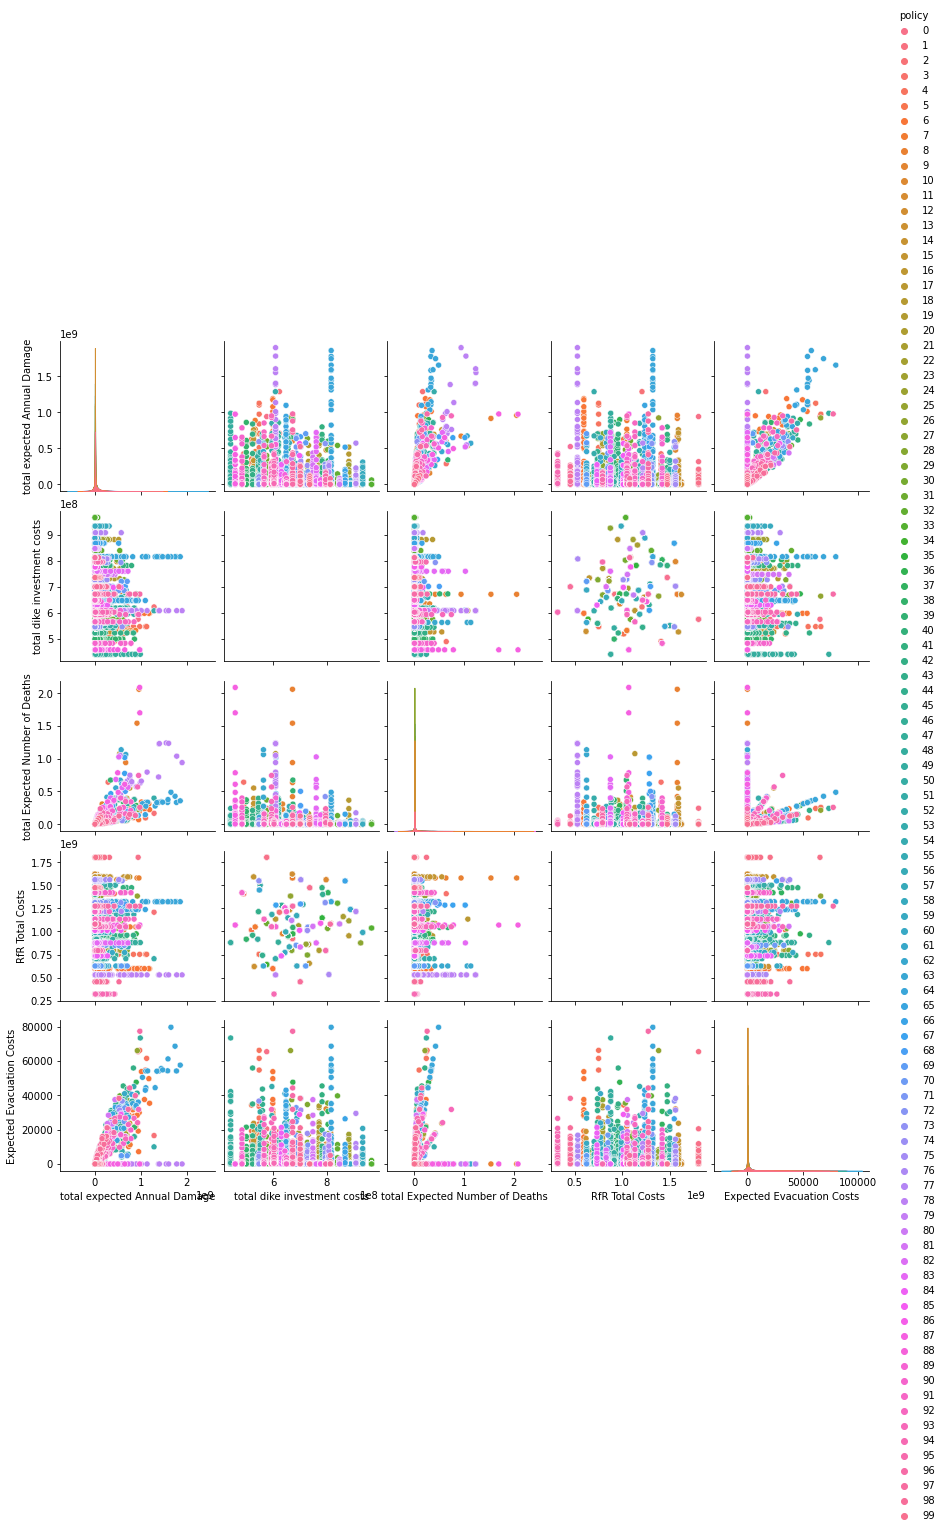

In [50]:
sns.pairplot(A_totaldata, hue='policy', vars=['total expected Annual Damage','total dike investment costs','total Expected Number of Deaths','RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

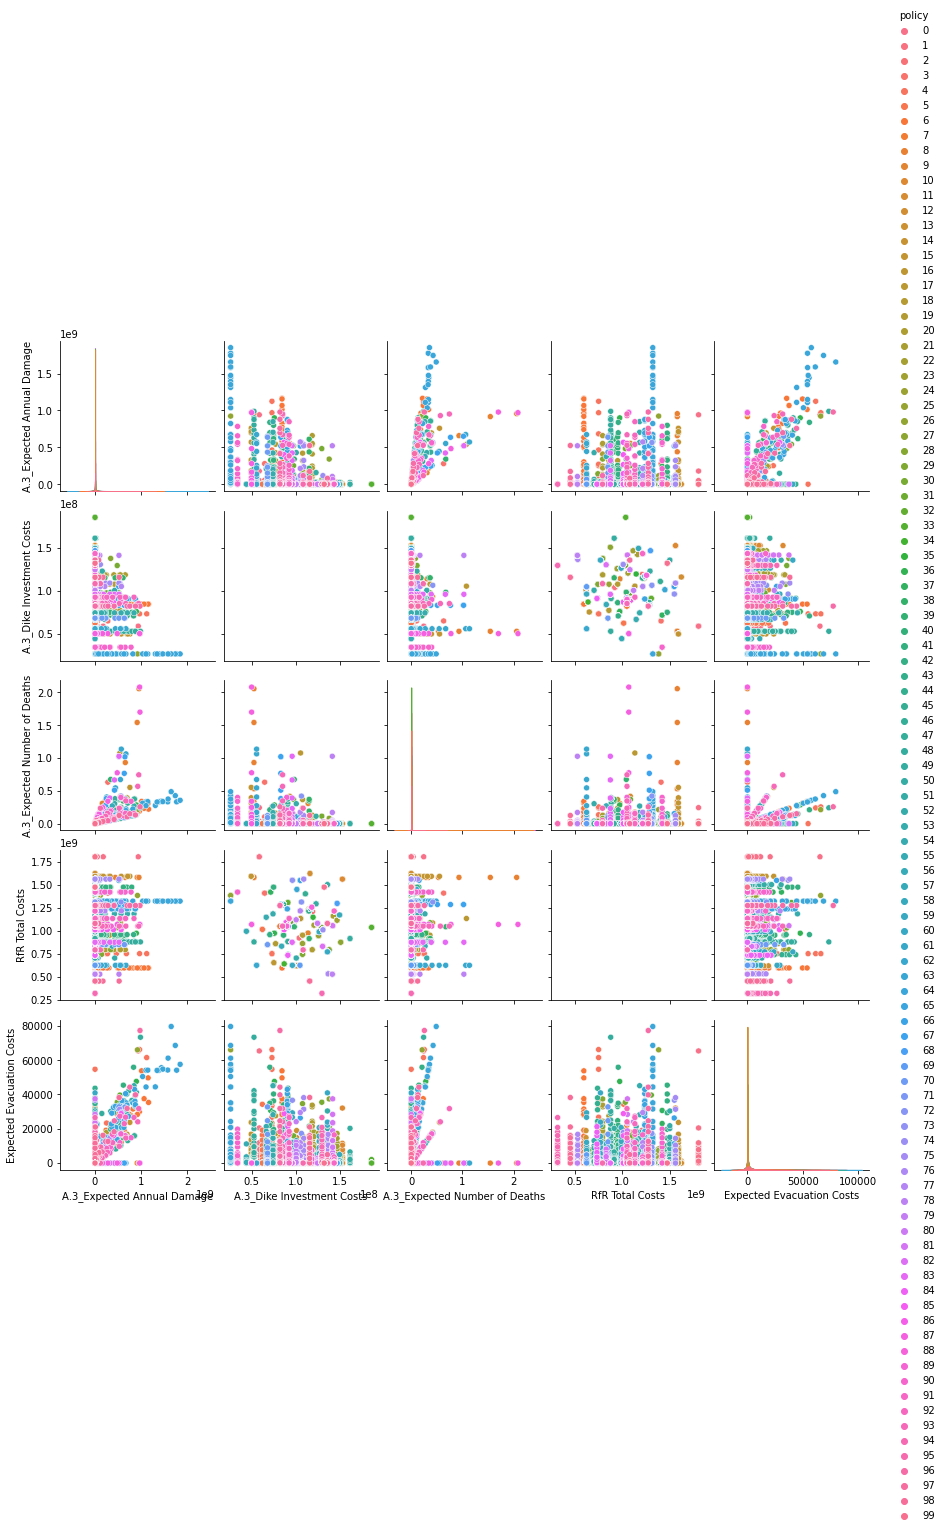

In [52]:
sns.pairplot(A_3data, hue='policy', vars=['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

Things to conclude:
*  Seems to be a clear connection between dike investment costs and expected evacuation costs & expected number of deaths-> the more dike investment, the less expected evactuation costs and the less expected number of deaths.
* This is not as clearly visible for the RFR total costs. More money spend on the RFR total costs does not seem to influence expected evacuation and expected number of deaths A3 positively, based on the above figure.
* Expected number of deaths, expected annual damage and expected evacuation costs seem positively  correlated.
    

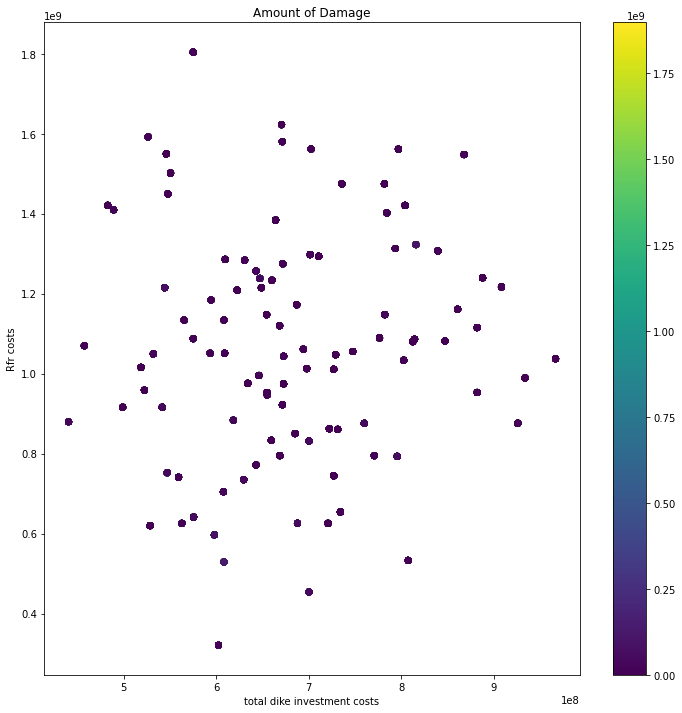

In [53]:
ADAMAGE = A_totaldata['total expected Annual Damage']
ADEATH = A_totaldata['total Expected Number of Deaths']
ACOST = A_totaldata['Expected Evacuation Costs']


fig, ax = plt.subplots(figsize=(12,12))
im=ax.scatter(A_totaldata['total dike investment costs'], A_totaldata['RfR Total Costs'], c=ADAMAGE,vmin=A_totaldata['total expected Annual Damage'].min(),vmax=A_totaldata['total expected Annual Damage'].max())
ax.set_title('Amount of Damage')
ax.set_xlabel('total dike investment costs')
ax.set_ylabel('Rfr costs')
fig.colorbar(im, ax=ax)


In [54]:
worst50 = sorted(outcomes['A.3_Expected Number of Deaths'])[-50:]
# worst = worst10[-1:][0]
# print(worst)
worst50

[0.3559487086687589,
 0.3664354611898629,
 0.3694039063004149,
 0.3700102033091586,
 0.3700769663197857,
 0.3752924431671422,
 0.3753675264045305,
 0.3754452840858338,
 0.3765871194416545,
 0.3777984887108839,
 0.3782602127926142,
 0.37835090857061854,
 0.3791722790728769,
 0.3800189188810716,
 0.3810705896306485,
 0.3818182802665268,
 0.3903398102291922,
 0.3943499821541652,
 0.3962024829001005,
 0.39914607164522015,
 0.400868100041425,
 0.4062752547719923,
 0.41753050730441,
 0.4203981695143,
 0.4266281454948742,
 0.4874082069711005,
 0.5102236403093883,
 0.5311225443454703,
 0.5451754694612697,
 0.5520669170780883,
 0.5686375332155118,
 0.6320505072228217,
 0.6661239697413748,
 0.6723686402618816,
 0.6739265072572145,
 0.7443337886493607,
 0.7665814639132824,
 0.7755976900936914,
 0.9317189310564654,
 1.0184674433193948,
 1.0213324211027446,
 1.02731010445715,
 1.0273522676355562,
 1.063438803495071,
 1.0772398631685824,
 1.1366057676343693,
 1.5425859379661209,
 1.7002723176763501,

In [55]:
y = outcomes['A.3_Expected Number of Deaths'] > worst50[0] 
y

array([False, False, False, ..., False, False, False])

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 49 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0019, coverage: 0.3877551020408163, density: 1.0 restricted_dimensions: 9


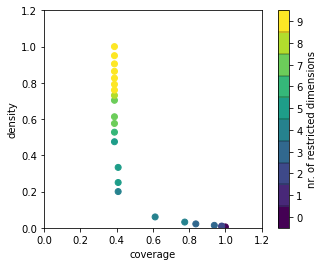

In [56]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['A.3_Expected Number of Deaths'] > worst50[0] 

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.01, mass_min=0.001)
box = prim_alg.find_box()

box.show_tradeoff()
plt.show()

In [57]:
experiments.dtypes

A.0_ID flood wave shape     float64
A.1_Bmax                    float64
A.1_Brate                  category
A.1_pfail                   float64
A.2_Bmax                    float64
A.2_Brate                  category
A.2_pfail                   float64
A.3_Bmax                    float64
A.3_Brate                  category
A.3_pfail                   float64
A.4_Bmax                    float64
A.4_Brate                  category
A.4_pfail                   float64
A.5_Bmax                    float64
A.5_Brate                  category
A.5_pfail                   float64
discount rate 0            category
discount rate 1            category
discount rate 2            category
0_RfR 0                     float64
0_RfR 1                     float64
0_RfR 2                     float64
1_RfR 0                     float64
1_RfR 1                     float64
1_RfR 2                     float64
2_RfR 0                     float64
2_RfR 1                     float64
2_RfR 2                     

coverage    0.387755
density            1
id                22
mass          0.0019
mean               1
res_dim            9
Name: 22, dtype: object

                                                               box 22  \
                                                                  min   
EWS_DaysToThreat                                                    0   
A.3_DikeIncrease 0                                                  0   
A.2_DikeIncrease 0                                                  0   
A.2_Brate                                                      {10.0}   
discount rate 2                                            {1.5, 2.5}   
A.5_Brate                                                      {10.0}   
A.1_Brate                                                 {10.0, 1.5}   
policy              {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...   
A.1_DikeIncrease 1                                                0.5   

                                             

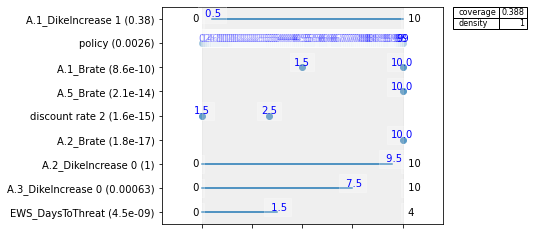

In [58]:
box.inspect(22)
box.inspect(22,style='graph')
plt.show()

In [59]:
box.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.004900,0,1.0000,0.004900,0
1,0.979592,0.007164,1,0.6700,0.007164,1
2,0.979592,0.009600,2,0.5000,0.009600,2
3,0.938776,0.013529,3,0.3400,0.013529,3
4,0.836735,0.021579,4,0.1900,0.021579,3
5,0.775510,0.031667,5,0.1200,0.031667,4
6,0.612245,0.060000,6,0.0500,0.060000,4
7,0.408163,0.200000,7,0.0100,0.200000,4
8,0.408163,0.250000,8,0.0080,0.250000,5
9,0.408163,0.333333,9,0.0060,0.333333,5


C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


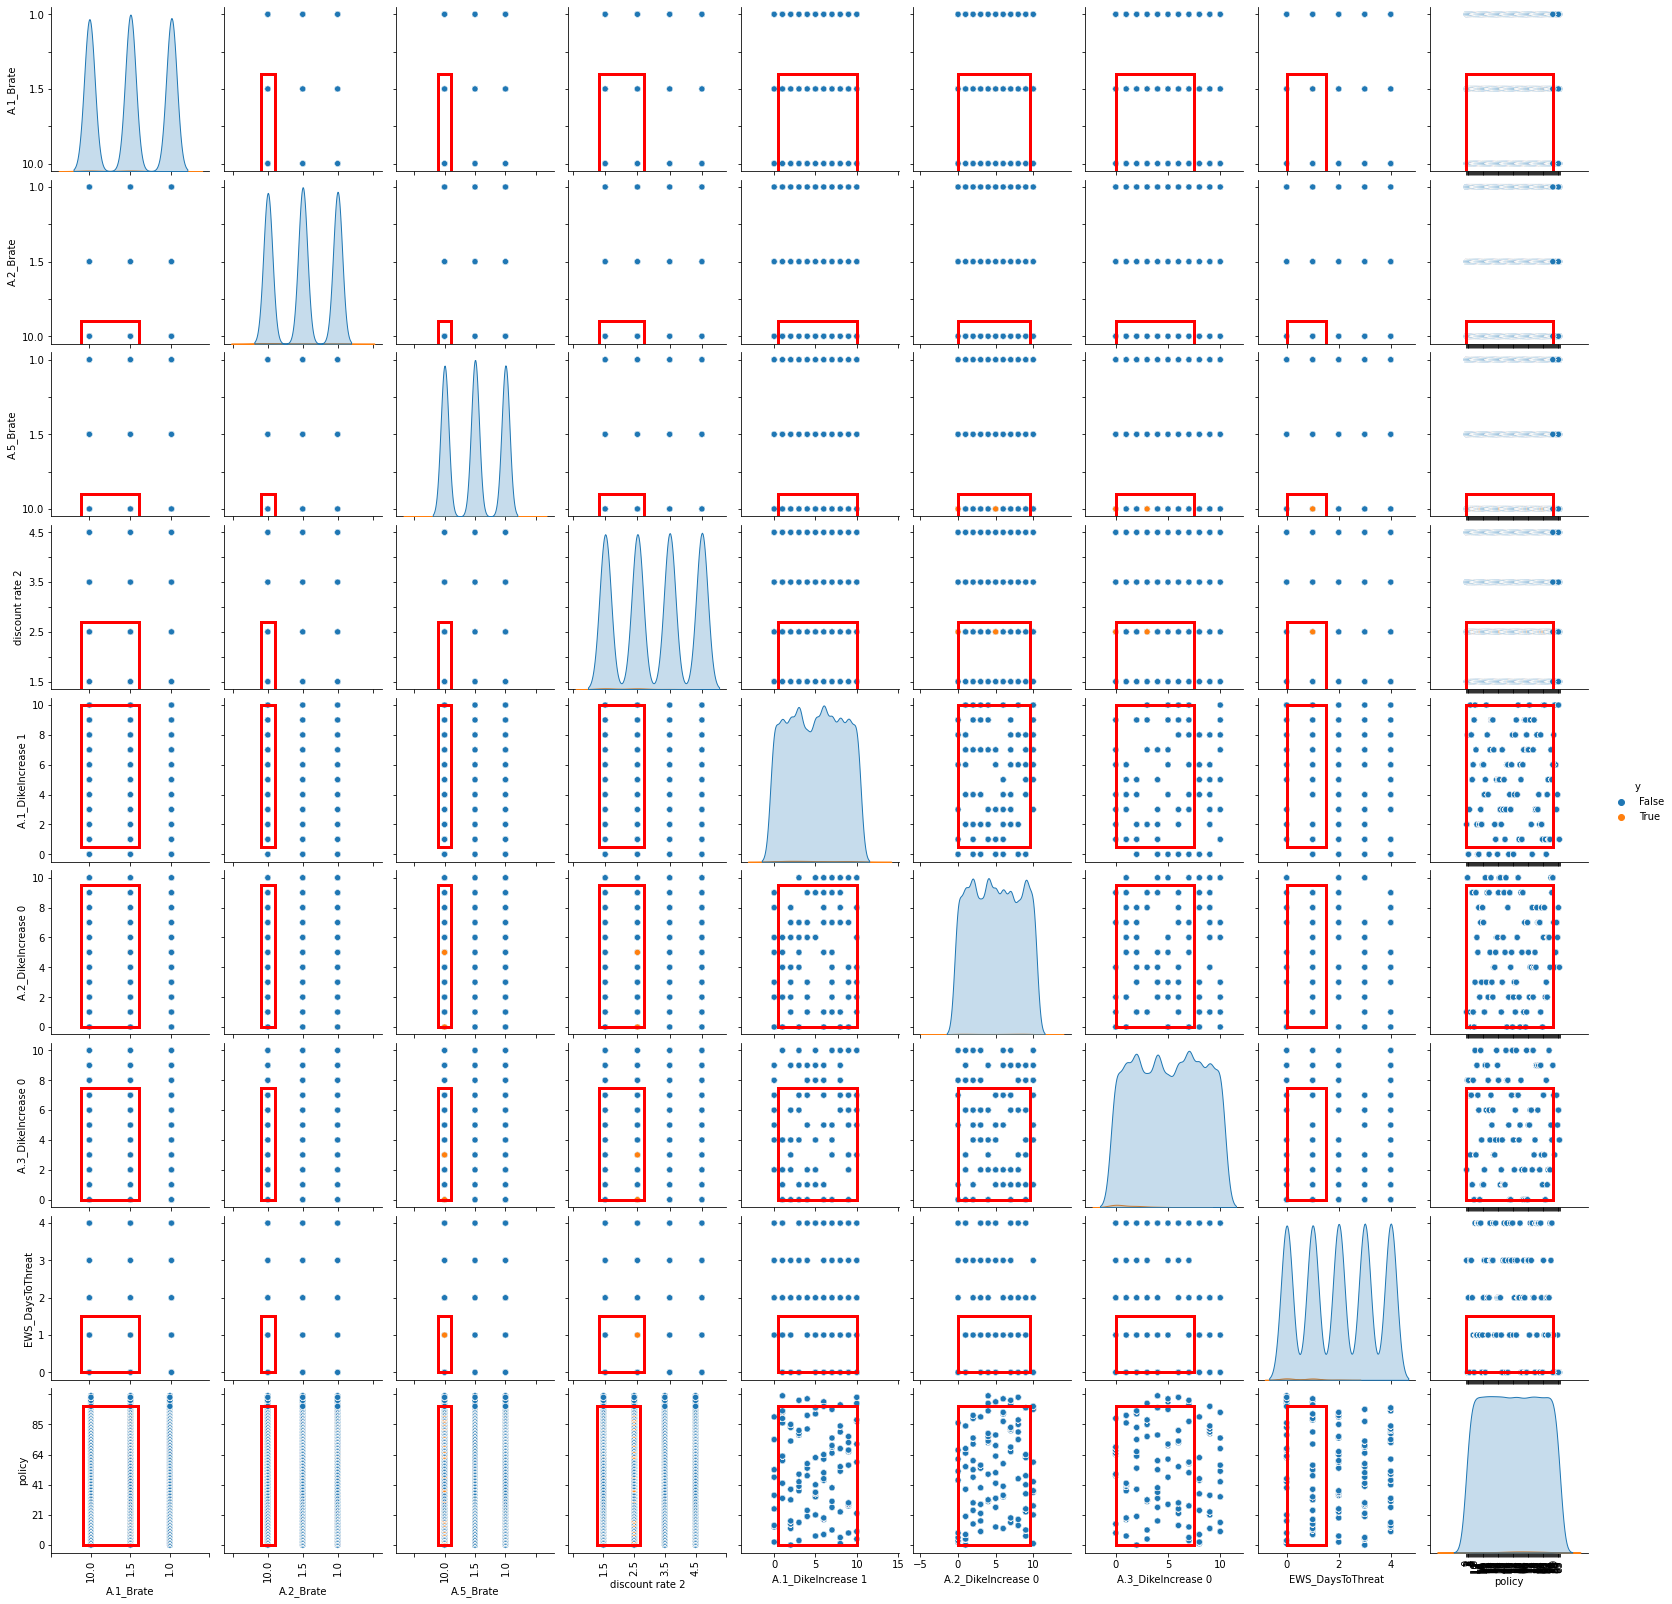

In [60]:
box.show_pairs_scatter(22)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category


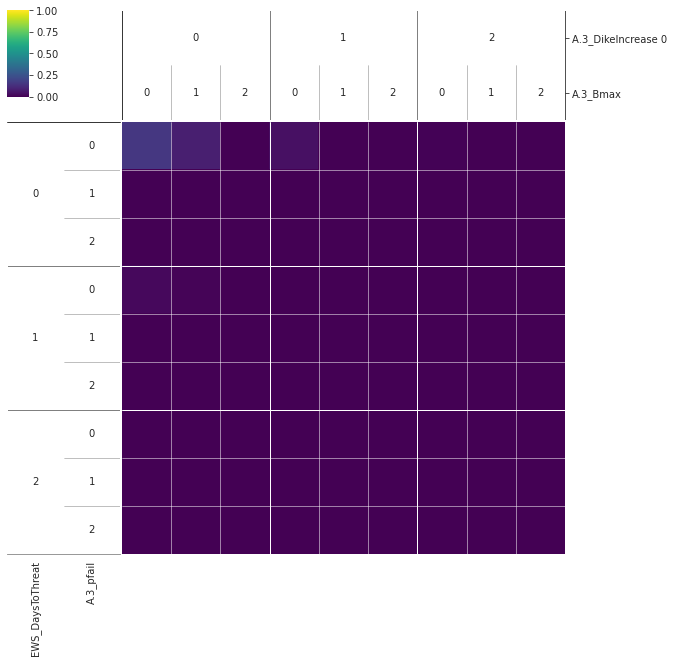

In [61]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

In [62]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]